(16238, 2)
(16239, 2)
                         Username     Opinion
Timestamp                                    
2024-01-01 00:00:00    victoria41     Neutral
2024-01-01 00:33:00      dsanchez  Supportive
2024-01-01 00:50:00    toddtanner     Neutral
2024-01-01 00:55:00         eholt  Supportive
2024-01-01 01:20:00  bakerdarrell    Opposing


C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



                         Username     Opinion  polarity
Timestamp                                              
2024-01-01 00:00:00    victoria41     Neutral       0.0
2024-01-01 00:33:00      dsanchez  Supportive       0.5
2024-01-01 00:50:00    toddtanner     Neutral       0.0
2024-01-01 00:55:00         eholt  Supportive       0.5
2024-01-01 01:20:00  bakerdarrell    Opposing       0.0


(16069, 4)


C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:72: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:73: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:74: UserWarn

(268.35, 133.375)
(271.6, 133.45)
(266.975, 136.75)
(269.175, 132.54999999999998)
(270.95, 133.07500000000002)


C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:84: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:85: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:84: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Arya Katoch\AppData\Local\Temp\ipykernel_16476\2966370355.py:85: Fu

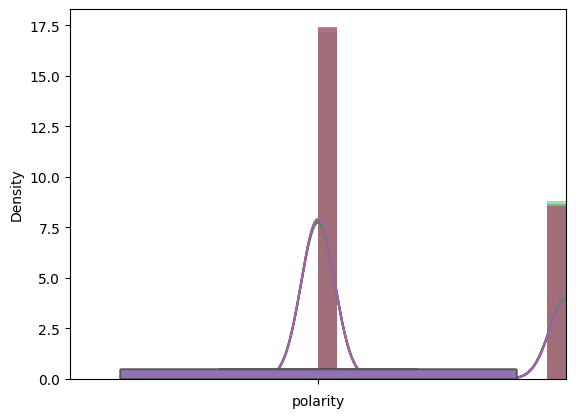

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from textblob import TextBlob 
from wordcloud import WordCloud 

import plotly.graph_objects as go

bjp=pd.read_csv(r'C:\Users\Arya Katoch\Desktop\2024_elections_bjp_opinions.csv',index_col=0)
congress=pd.read_csv(r'C:\Users\Arya Katoch\2024_elections_congress_opinions.csv', index_col=0)
TNC=pd.read_csv(r'C:\Users\Arya Katoch\2024_elections_TNC_opinions.csv',index_col=0)
AAP=pd.read_csv(r'C:\Users\Arya Katoch\2024_elections_AAP_opinions.csv',index_col=0)
AIADMK=pd.read_csv(r'C:\Users\Arya Katoch\2024_elections_AIADMK_opinions.csv',index_col=0)
print(bjp.shape)
print(congress.shape)
print(bjp.head())
bjp['Opinion'][200]
TextBlob(bjp['Opinion'][200]).sentiment
def polarity(review):
    return TextBlob(review).sentiment.polarity
bjp['polarity']=bjp['Opinion'].apply(polarity)
congress['polarity']=congress['Opinion'].apply(polarity)
TNC['polarity']=TNC['Opinion'].apply(polarity)
AIADMK['polarity']=AIADMK['Opinion'].apply(polarity)
AAP['polarity']=AAP['Opinion'].apply(polarity)
print(bjp.head())
bjp['Expression']=np.where(bjp['polarity']>0,'polarity','Negative')
bjp.loc[bjp.polarity==0,'Expression']='Neutral'
congress['Expression']=np.where(congress['polarity']>0,'polarity','Negative')
congress.loc[congress.polarity==0,'Expression']='Neutral'
TNC['Expression']=np.where(TNC['polarity']>0,'polarity','Negative')
TNC.loc[TNC.polarity==0,'Expression']='Neutral'
AIADMK['Expression']=np.where(AIADMK['polarity']>0,'polarity','Negative')
AIADMK.loc[AIADMK.polarity==0,'Expression']='Neutral'
AAP['Expression']=np.where(AAP['polarity']>0,'polarity','Negative')
AAP.loc[AAP.polarity==0,'Expression']='Neutral'
bjp.head()
def exp_graph(reviews,title):
    group=reviews.groupby('Expression').count()
    pol_count=list(group['polarity'])
    exp=list(group.index)
    
    group_list= list(zip(pol_count,exp))
    df=pd.DataFrame(group_list,columns=['pol_count','exp'])
    df['color']='rgb(14,185,54)'
    df.loc[df.exp=='Neutral','color']='rgb(18,29,31)'
    df.loc[df.exp=='Negative','color']='rgb(206,31,31)'

    go.Figure(go.Bar(x=df['pol_count'],
                     y=df['exp'],
                     marker={'color':df['color']})).update_layout(title_text=title).show()
    
    
exp_graph(bjp,'Analysis for bjp')
exp_graph(congress,'Analysis for congress')
exp_graph(TNC,'Analysis for TNC')
exp_graph(AIADMK,'Analysis fro AIADMK')
exp_graph(AAP,'Analysis for AAP')
def balanced_data(reviews,n):
    np.random.seed(10)
    drop=np.random.choice(reviews.index,n,replace=False)
    review_subset=reviews.drop(drop)
    return review_subset
bjp_subset=balanced_data(bjp,169)
congress_subset=balanced_data(congress,37)
TNC_subset=balanced_data(TNC,45)
AIADMK_subset=balanced_data(congress,170)
AAP_subset=balanced_data(congress,78)
print(bjp_subset.shape)

sns.distplot(bjp_subset['polarity'])
sns.distplot(congress_subset['polarity'])
sns.distplot(TNC_subset['polarity'])
sns.distplot(AIADMK_subset['polarity'])
sns.distplot(AAP_subset['polarity'])
sns.boxplot(bjp_subset['polarity'])
sns.boxplot(congress_subset['polarity'])
sns.boxplot(TNC_subset['polarity'])
sns.boxplot(AIADMK_subset['polarity'])
sns.boxplot(AAP_subset['polarity'])

def pol_percent(subset,total):
    neg_percent=((subset.groupby('Expression').count())['polarity'][0]/total)*100
    pos_percent=((subset.groupby('Expression').count())['polarity'][1]/total)*100

    return neg_percent,pos_percent

bjp_pol_percent=pol_percent(bjp_subset,4000)
print(bjp_pol_percent)
congress_pol_percent=pol_percent(congress_subset,4000)
print(congress_pol_percent)
TNC_pol_percent=pol_percent(TNC_subset,4000)
print(TNC_pol_percent)
AIADMK_pol_percent=pol_percent(AIADMK_subset,4000)
print(AIADMK_pol_percent)
AAP_pol_percent=pol_percent(AAP_subset,4000)
print(AAP_pol_percent)




parties=['BJP','Congress','TNC','AIADMK','AAP']
pos=[bjp_pol_percent[1],congress_pol_percent[1],TNC_pol_percent[1],AIADMK_pol_percent[1],AAP_pol_percent[1]]
neg=[bjp_pol_percent[0],congress_pol_percent[0],TNC_pol_percent[0],AIADMK_pol_percent[0],AAP_pol_percent[0]]
go.Figure(data=[
    go.Bar(name='positive',x=parties,y=pos),
    go.Bar(name='negative',x=parties,y=neg)
])